<a href="https://colab.research.google.com/github/azizghozi25/The-Number-of-Student-Prediction-Using-LSTM/blob/main/Kerja_Praktek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn
import math
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display, Image
import gspread
import matplotlib.animation as animation
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from google.colab import files
uploaded = files.upload()


Saving LW321Singlerowxls (1).xls to LW321Singlerowxls (1).xls


In [ ]:
ds=pd.read_csv("datasekolahgunungsugihh.csv", delimiter=";")
ta= list(ds['Tahun Ajaran'])
ds['Tahun Ajaran']= ta
print(ds)


         Tahun Ajaran  SMP NEGERI 1 GUNUNG SUGIH  ...  SMP KRIDA UTAMA  Total 
0   2015/2016 Ganjil                         653  ...               66    1765
1     2015/2016 Genap                        653  ...               66    1765
2   2016/2017 Ganjil                         663  ...               57    1666
3    2016/2017 Genap                         663  ...               57    1666
4   2017/2018 Ganjil                         661  ...               57    1651
5     2017/2018 Genap                        661  ...               55    1645
6    2018/2019 Ganjil                        594  ...               56    1643
7     2018/2019 Genap                        595  ...               55    1639
8    2019/2020 Ganjil                        578  ...               78    1717
9     2019/2020 Genap                        578  ...               78    1721
10   2020/2021 Ganjil                        583  ...               91    1803
11    2020/2021 Genap                        432  ..

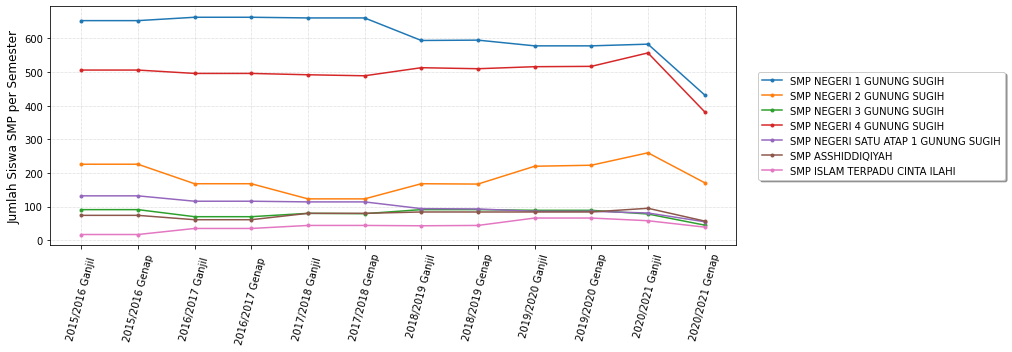

In [ ]:
for kolom in ds.columns:
  if kolom == ds.columns[0]:
    continue
  elif kolom == ds.columns[8]:
    break
  plt.plot(ds['Tahun Ajaran'],ds[kolom], label=kolom, marker='.')
plt.ylabel('Jumlah Siswa SMP per Semester', fontsize=12)
plt.xticks( rotation=75) 
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(loc='right',bbox_to_anchor=(1.4,0.5), shadow=True)
plt.gcf().set_size_inches(15,5)
plt.tight_layout() 
plt.show()

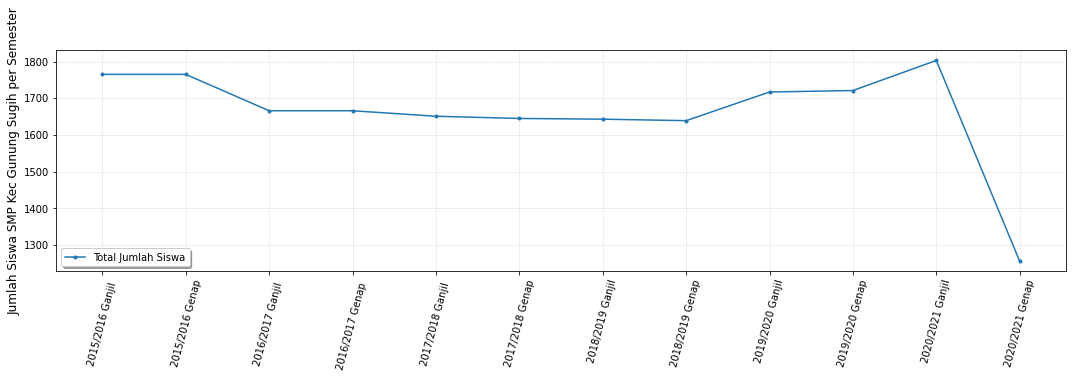

In [ ]:
plt.plot(ds['Tahun Ajaran'], ds['Total '], label= 'Total Jumlah Siswa', marker='.')
plt.ylabel('Jumlah Siswa SMP Kec Gunung Sugih per Semester', fontsize=12)
plt.xticks( rotation=75) 
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(loc='lower left', shadow=True)
plt.gcf().set_size_inches(15,5)
plt.tight_layout() 
plt.show()

In [ ]:
dsk = ds.filter(['Total '])
datasmp = dsk.values
training_data_len = math.ceil(len(datasmp) * 4/6)
mmscaler = MinMaxScaler(feature_range=(0, 1))
np_data = mmscaler.fit_transform(datasmp)



In [ ]:
sequence_length = 4
index_smp = dsk.columns.get_loc('Total ')
train_data_len = math.ceil(np_data.shape[0] * 4/6)

train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]


In [ ]:
data_len=train_data.shape[0]

train_data

array([[0.93053016],
       [0.93053016],
       [0.74954296],
       [0.74954296],
       [0.72212066],
       [0.71115174],
       [0.70749543],
       [0.70018282]])

In [ ]:
test_data

array([[0.72212066],
       [0.71115174],
       [0.70749543],
       [0.70018282],
       [0.84277879],
       [0.85009141],
       [1.        ],
       [0.        ]])

In [ ]:
def partition_dataset(sequence_length, dsk):
  x, y = [], []
  data_len = dsk.shape[0]
  for i in range(sequence_length, data_len):
    x.append(dsk[i-sequence_length:i, :])
    y.append(dsk[i, index_smp])

  x = np.array(x)
  y = np.array(y)
  return x, y

x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_test[1][sequence_length-1][index_smp])
print(y_test[0])

(4, 4, 1) (4,)
(4, 4, 1) (4,)
0.8427787934186473
0.8427787934186473


In [ ]:
# Configure the neural network model
model = Sequential()

neurons = sequence_length

# Model with sequence_length Neurons 
# inputshape = sequence_length Timestamps
model.add(tf.keras.layers.LSTM(units=100,  activation='relu',input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1)) 
  
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:

# Training the model
history=model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:


ds_new = ds.filter(['Total '])
last_sms_scaled = mmscaler.transform(ds_new[-4:].values)

X_test = []
X_test.append(last_sms_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_smp = model.predict(X_test)
pred_smp_unscaled = mmscaler.inverse_transform(pred_smp)

smp_today = round(ds_new['Total '][11], 0)
predicted_smp = round(pred_smp_unscaled.ravel()[0], 0)

print(f'Jumlah Siswa SMP Terbaru :{smp_today}')
print(f'Prediksi Jumlah Siswa SMP Semester Depan : {predicted_smp}')


Jumlah Siswa SMP Terbaru :1256
Prediksi Jumlah Siswa SMP Semester Depan : 1622.0


In [ ]:
xprediction = model.predict(x_train)
xpredictions = mmscaler.inverse_transform(xprediction)
xpredictions = xpredictions.ravel().tolist()
xpredictions

[1665.09912109375, 1649.2357177734375, 1632.287841796875, 1629.2213134765625]

In [ ]:
prediction = model.predict(x_test)
predictions = mmscaler.inverse_transform(prediction)

predictions = predictions.ravel().tolist()
predictions

[1625.5516357421875,
 1632.6041259765625,
 1642.2691650390625,
 1662.3897705078125]

In [ ]:



MAE = mean_absolute_error(prediction, y_test)
print('MAE:' + str(round(MAE,5)))

RMSE = np.sqrt(np.mean(prediction - y_test)**2)
print('RMSE:' + str(round(RMSE, 5)))

MAE:0.34139
RMSE:0.03008


In [ ]:


trainScore = np.sqrt(np.mean(y_train - xprediction)**2)
print('Train Score Kasus: %.7f RMSE'%(trainScore))
testScore = np.sqrt(np.mean(y_test - prediction)**2)
print('Test Score Kasus: %.7f RMSE'%(testScore))

Train Score Kasus: 0.0009854 RMSE
Test Score Kasus: 0.0300799 RMSE


array([0.72212066, 0.71115174, 0.70749543, 0.70018282])

array([[0.7413405],
       [0.711865 ],
       [0.6801328],
       [0.6744309]], dtype=float32)

In [ ]:
akurasi_train = (1-trainScore)*100
akurasi_test = (1-testScore)*100
print('Accuracy Train Score Kasus: %.7f'%(akurasi_train)+'%')
print('Accuracy Test Score Kasus: %.7f'%(akurasi_test)+'%')

Accuracy Train Score Kasus: 99.1704650%
Accuracy Test Score Kasus: 97.4768848%


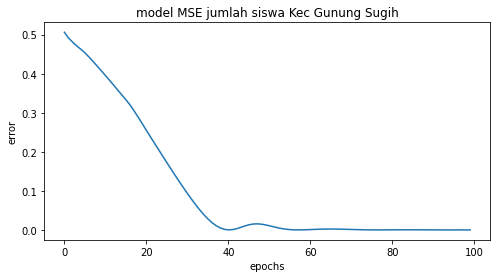

In [ ]:
def model_loss(history,case):
    
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.title('model MSE'+ str(case))
    plt.ylabel('error')
    plt.xlabel('epochs')
    plt.show();
model_loss(history, ' jumlah siswa Kec Gunung Sugih')

In [ ]:

y_test= np.array(y_test.reshape(-1,1))
y_test = mmscaler.inverse_transform(y_test)

In [ ]:
pred = xpredictions + predictions
pred

[1661.51318359375,
 1645.39013671875,
 1628.03271484375,
 1624.9136962890625,
 1621.147216796875,
 1629.6552734375,
 1639.7691650390625,
 1661.63427734375]

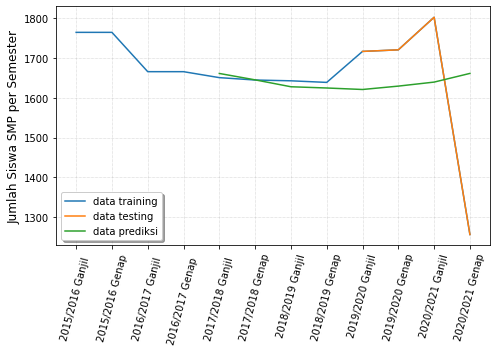

In [ ]:


plt.plot(ta, ds_new, label='data training')
#plt.plot(ta[sequence_length:8], xpredictions)
plt.plot(ta[8:], y_test, label='data testing')
#plt.plot(ta[8:], predictions)
plt.plot(ta[sequence_length:], pred, label='data prediksi')
plt.ylabel('Jumlah Siswa SMP per Semester', fontsize=12)
plt.xticks( rotation=75) 
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(loc='best', shadow=True)
plt.gcf().set_size_inches(7,5)
plt.tight_layout() 
plt.show()


In [ ]:
min(history.history['loss'])

0.0003960089525207877

In [ ]:
#e = 1- train/100
e = 1- 0.994372 / 100
e

0.99005628